QUERY POINTS (UNIFORM)

In [1]:
import csv
import numpy as np

# Constants
volume_size = (1.0e9) ** 3  
num_points = int(1e4)

# We generate random points
x = np.random.uniform(0, 1e9, num_points)  # X-coordinate in Mpc
y = np.random.uniform(0, 1e9, num_points)  # Y-coordinate in Mpc
z = np.random.uniform(0, 1e9, num_points)  # Z-coordinate in Mpc

# Create a list of points as tuples
points = [(x[i], y[i], z[i]) for i in range(num_points)]

# Saving the points to a CSV file
csv_file = 'random_points.csv'
with open(csv_file, 'w', newline='') as file: #w mode indicates that the csv file is opened for writing
    writer = csv.writer(file)
    writer.writerow(["X", "Y", "Z"])  # Putting a header
    writer.writerows(points)

print(f"Points saved to '{csv_file}'")


Points saved to 'random_points.csv'


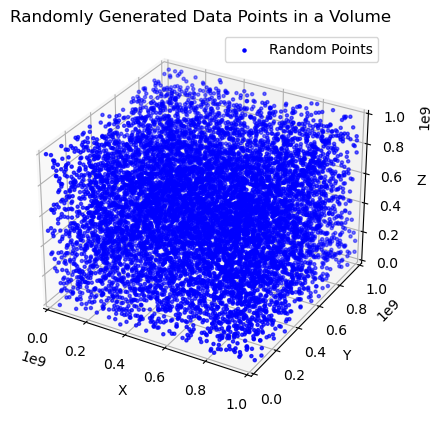

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating  a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   #projecttion='3d' says that the plot is in 3D; 111 indicates only 1 plot in a 1x1 grid

# Plotting the points
ax.scatter(x, y, z, c='b', marker='.', label='Random Points')

# Setting labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Randomly Generated Data Points in a Volume')

# Setting axis limits to match the volume size
ax.set_xlim(0, 1e9)
ax.set_ylim(0, 1e9)
ax.set_zlim(0, 1e9)

# Showing legend
ax.legend()

# Showing the plot
plt.show()

THE DATA (UNIFORM DISTRIBUTED AGAIN)

In [3]:
import numpy as np
import csv

# Constants
volume_size = (1.0e9) ** 3  
num_points = int(1e4)       # Number of points to generate

# We generate random points
x = np.random.uniform(0, 1e9, num_points)  # X-coordinate in Mpc
y = np.random.uniform(0, 1e9, num_points)  # Y-coordinate in Mpc
z = np.random.uniform(0, 1e9, num_points)  # Z-coordinate in Mpc

# Create a list of points as tuples
points = [(x[i], y[i], z[i]) for i in range(num_points)]

# Saving these points to a CSV file
csv_file = 'random_points_generated.csv'
with open(csv_file, 'w', newline='') as file:  #w mode indicates that the csv file is opened for writing
    writer = csv.writer(file)
    writer.writerow(["X", "Y", "Z"])  # Putting a header
    writer.writerows(points)

print(f"{num_points} random points saved to '{csv_file}'")


10000 random points saved to 'random_points_generated.csv'


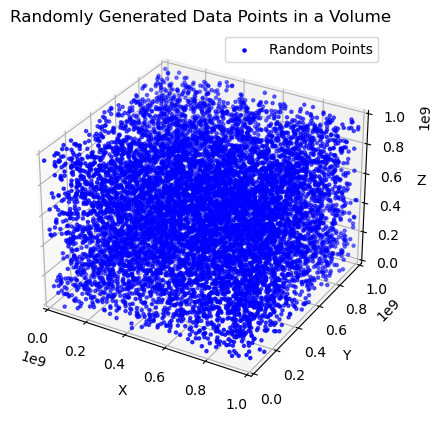

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(x, y, z, c='b', marker='.', label='Random Points')

# Setting labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Randomly Generated Data Points in a Volume')

# Setting axis limits to match the volume size
ax.set_xlim(0, 1e9)
ax.set_ylim(0, 1e9)
ax.set_zlim(0, 1e9)

# Showing legend
ax.legend()

# Showing the plot
plt.show()

DISTANCES

In [5]:
import os

# Function to calculate the distance between two points
def calculate_distance(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return distance

# Creating a folder to store distance data if it doesn't exist
folder_name = 'distance_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Loading the points from the second CSV file (dataset 2)
csv_file2 = 'random_points_generated.csv'  
with open(csv_file2, 'r') as file:  #r is used to open as only read mode
    reader = csv.reader(file)
    next(reader)  # Skipping the header row
    points2 = [(float(row[0]), float(row[1]), float(row[2])) for row in reader]

# Loading the points from the first CSV file (dataset 1)
csv_file1 = 'random_points.csv'  
with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skipping the header row

    for idx, row in enumerate(reader): #enumerate is used to keep a track of the index as well; here idx is the index
        # Reading a point from dataset 1
        point1 = (float(row[0]), float(row[1]), float(row[2]))

        # Calculating distances from point1 to all points in dataset 2
        distances = [calculate_distance(point1, point2) for point2 in points2]

        # Saving distances to a CSV file in the 'distance_data' folder
        output_file = os.path.join(folder_name, f'distances_to_point{idx}.csv')
        with open(output_file, 'w', newline='') as output_file:
            writer = csv.writer(output_file)
            writer.writerow(["Distance"])  # Header
            writer.writerows([[distance] for distance in distances])

        print(f"Distances from point{idx} to all points in dataset 2 saved to '{output_file}'")


Distances from point0 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_data/distances_to_point0.csv' mode='w' encoding='UTF-8'>'
Distances from point1 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_data/distances_to_point1.csv' mode='w' encoding='UTF-8'>'
Distances from point2 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_data/distances_to_point2.csv' mode='w' encoding='UTF-8'>'
Distances from point3 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_data/distances_to_point3.csv' mode='w' encoding='UTF-8'>'
Distances from point4 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_data/distances_to_point4.csv' mode='w' encoding='UTF-8'>'
Distances from point5 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_data/distances_to_point5.csv' mode='w' encoding='UTF-8'>'
Distances from point6 to all points in dataset 2 saved to '<_io.TextIOWrapper name='distance_d

In [6]:
import os
import csv

# Function to find the lowest distance in a CSV file
def find_lowest_distance(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skipping the header row
        distances = [float(row[0]) for row in reader]
        if distances:
            lowest_distance = min(distances)
            return lowest_distance
        else:
            return None

# Directory containing distance data files
folder_name = 'distance_data'

# Getting a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_name) if file.endswith('.csv')]

# Creating a list to store the lowest distances
lowest_distances = []

# Iterating through the CSV files and find the lowest distance for each
for csv_file in csv_files:
    file_path = os.path.join(folder_name, csv_file)
    lowest_distance = find_lowest_distance(file_path)
    if lowest_distance is not None:
        lowest_distances.append(lowest_distance)

# Creating a CSV file to store the lowest distances
output_file = os.path.join(folder_name, 'lowest_distances.csv')
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["File Name", "Lowest Distance"])  # Header
    for csv_file, lowest_distance in zip(csv_files, lowest_distances):
        writer.writerow([csv_file, lowest_distance])

if lowest_distances:
    print(f"Lowest distances saved to '{output_file}'")
else:
    print("No CSV files with distance data found in the folder.")


Lowest distances saved to 'distance_data/lowest_distances.csv'


CDF

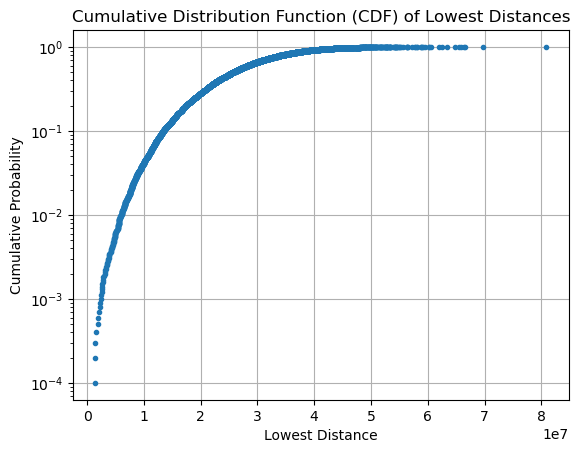

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Loading the lowest distances from the CSV file
csv_file = 'distance_data/lowest_distances.csv'
lowest_distances = []

with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if present
    for row in reader:
        lowest_distances.append(float(row[1]))

# Sorting the lowest distances in increasing order
lowest_distances.sort()

# Calculating the cumulative distribution function (CDF)
NN1cdf = np.arange(1, len(lowest_distances) + 1) / len(lowest_distances)

# Plotting the CDF
plt.plot(lowest_distances, NN1cdf, marker='.', linestyle='none')
plt.xlabel('Lowest Distance')
plt.yscale('log')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Lowest Distances')
plt.grid(True)
plt.show()


2NN-CDF

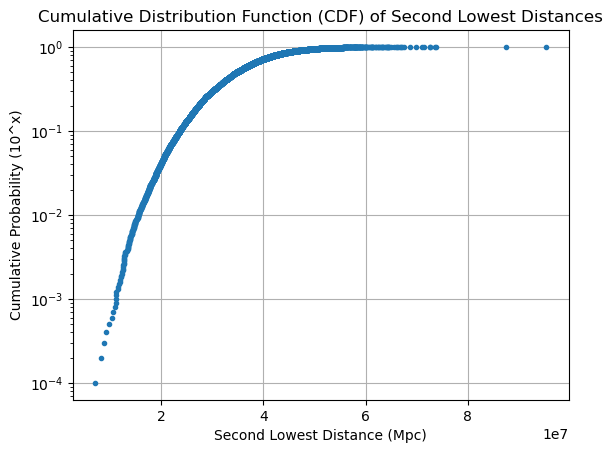

In [8]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the distance data files
folder_name = 'distance_data'

# Getting a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_name) if file.endswith('.csv')]

# Creating a list to store the second lowest distances
second_lowest_distances = []

# Iterating through the CSV files and find the second lowest distance for each
for csv_file in csv_files:
    file_path = os.path.join(folder_name, csv_file)

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row if present
        distances = [float(row[0]) for row in reader if row[0].replace('.', '', 1).isdigit()]

        if len(distances) >= 2:
            sorted_distances = sorted(distances)
            second_lowest_distance = sorted_distances[1]
            second_lowest_distances.append(second_lowest_distance)

# Calculating the CDF of the second lowest distances
sorted_second_lowest_distances = sorted(second_lowest_distances)
NN2cdf = np.arange(1, len(sorted_second_lowest_distances) + 1) / len(sorted_second_lowest_distances)

# Plotting the CDF with a y-axis on a 10^power scale (logarithmic scale)
plt.plot(sorted_second_lowest_distances, NN2cdf, marker='.', linestyle='none')
plt.xlabel('Second Lowest Distance (Mpc)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.ylabel('Cumulative Probability (10^x)')
plt.title('Cumulative Distribution Function (CDF) of Second Lowest Distances')
plt.grid(True)
plt.show()


3NN-CDF

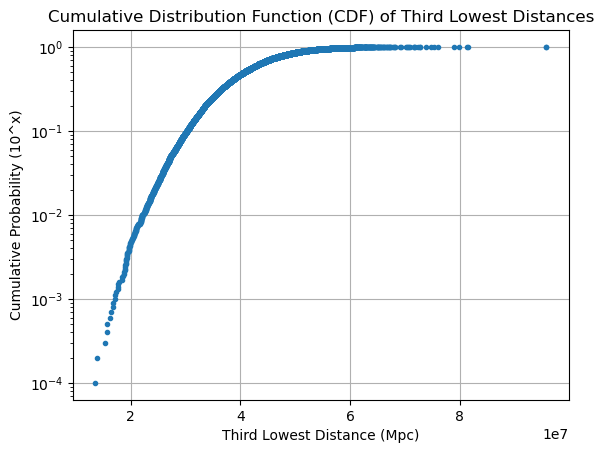

In [9]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the distance data files
folder_name = 'distance_data'

# Getting a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_name) if file.endswith('.csv')]

# Creating a list to store the third lowest distances
third_lowest_distances = []

# Iterating through the CSV files and find the second lowest distance for each
for csv_file in csv_files:
    file_path = os.path.join(folder_name, csv_file)

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skipping the header row
        distances = [float(row[0]) for row in reader if row[0].replace('.', '', 1).isdigit()]

        if len(distances) >= 3:
            sorted_distances = sorted(distances)
            third_lowest_distance = sorted_distances[2]
            third_lowest_distances.append(third_lowest_distance)

# Calculating the CDF of the third lowest distances
sorted_third_lowest_distances = sorted(third_lowest_distances)
NN3cdf = np.arange(1, len(sorted_third_lowest_distances) + 1) / len(sorted_third_lowest_distances)

# Plotting the CDF with a y-axis on a 10^power scale (logarithmic scale)
plt.plot(sorted_third_lowest_distances, NN3cdf, marker='.', linestyle='none')
plt.xlabel('Third Lowest Distance (Mpc)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.ylabel('Cumulative Probability (10^x)')
plt.title('Cumulative Distribution Function (CDF) of Third Lowest Distances')
plt.grid(True)
plt.show()


4NN CDF

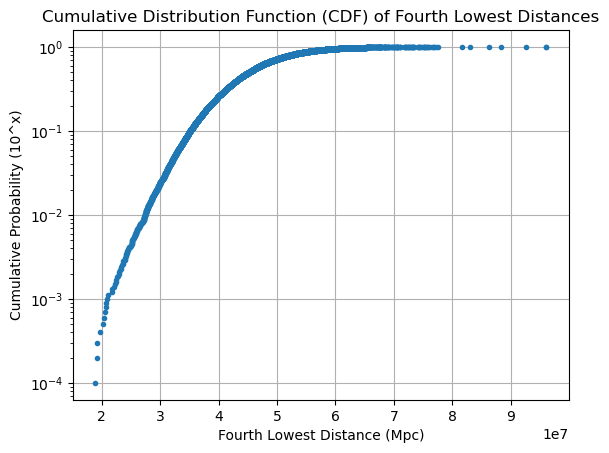

In [10]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the distance data files
folder_name = 'distance_data'

# Getting a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_name) if file.endswith('.csv')]

# Creating a list to store the fourth lowest distances
fourth_lowest_distances = []

# Iterating through the CSV files and find the fourth lowest distance for each
for csv_file in csv_files:
    file_path = os.path.join(folder_name, csv_file)

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skipping the header row
        distances = [float(row[0]) for row in reader if row[0].replace('.', '', 1).isdigit()]

        if len(distances) >= 4:
            sorted_distances = sorted(distances)
            fourth_lowest_distance = sorted_distances[3]
            fourth_lowest_distances.append(fourth_lowest_distance)

# Calculating the CDF of the third lowest distances
sorted_fourth_lowest_distances = sorted(fourth_lowest_distances)
NN4cdf = np.arange(1, len(sorted_fourth_lowest_distances) + 1) / len(sorted_fourth_lowest_distances)

# Plotting the CDF with a y-axis on a 10^power scale (logarithmic scale)
plt.plot(sorted_fourth_lowest_distances, NN4cdf, marker='.', linestyle='none')
plt.xlabel('Fourth Lowest Distance (Mpc)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.ylabel('Cumulative Probability (10^x)')
plt.title('Cumulative Distribution Function (CDF) of Fourth Lowest Distances')
plt.grid(True)
plt.show()


ALL THE 4 PLOTS

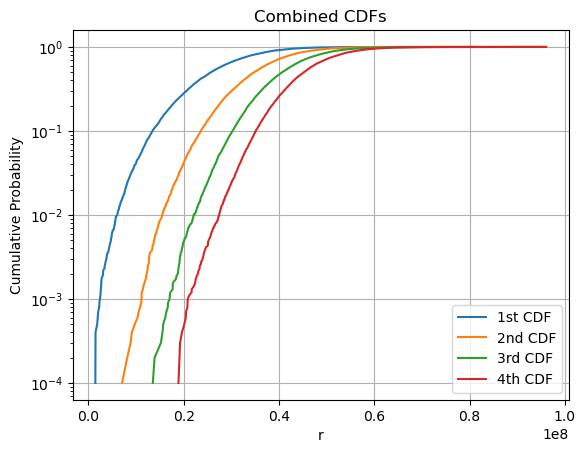

In [11]:
# Plotting the first CDF on the same graph
plt.plot(lowest_distances, NN1cdf, label='1st CDF')

# Plotting the second CDF on the same graph
plt.plot(sorted_second_lowest_distances, NN2cdf, label='2nd CDF')

# Plotting the third CDF on the same graph
plt.plot(sorted_third_lowest_distances, NN3cdf, label='3rd CDF')

# Plotting the fourth CDF on the same graph
plt.plot(sorted_fourth_lowest_distances, NN4cdf, label='4th CDF')

# Setting labels and legend
plt.xlabel('r')
plt.ylabel('Cumulative Probability')
plt.yscale('log')
plt.title('Combined CDFs')
plt.legend()

# Display the combined plot
plt.grid(True)
plt.show()

ANALYTIC PLOTS

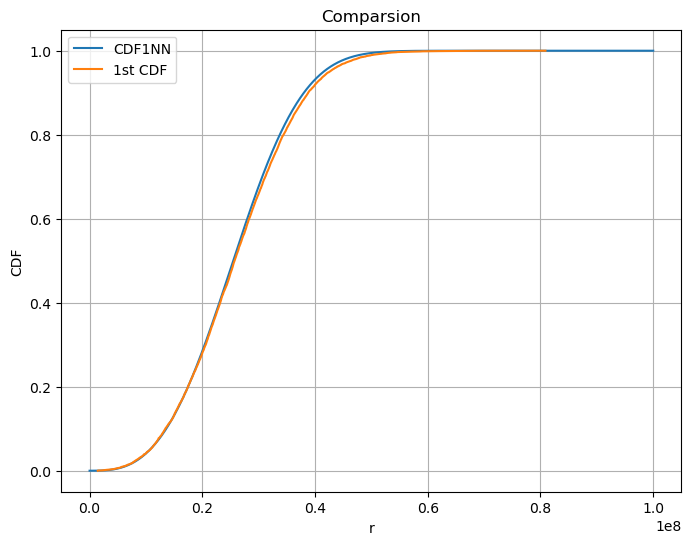

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the number density of points (n) and volume (V)
volume = (1e9)**3 
n = (10**4)/volume


# Calculating the CDF1NN
def CDF1NN(n, r):
    return 1 - np.exp(-n * np.pi * r**3 * 4/3)

# Generating r values for the CDF
r = np.linspace(0, 10**8, 1000)

# Calculating CDF values
y = CDF1NN(n, r)

# Plotting the CDF
plt.figure(figsize=(8, 6))
plt.plot(r, y, label='CDF1NN')

plt.plot(lowest_distances, NN1cdf, label='1st CDF')

plt.xlabel('r')
plt.ylabel('CDF')
plt.title('Comparsion')
plt.legend()
plt.grid(True)
plt.show()
